In [31]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

import matplotlib.pyplot as plt

In [15]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

## Find Books

In [16]:
page_url="https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"

In [17]:
driver.get(page_url)

In [18]:
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [19]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [20]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [21]:
driver.get(book_categories[0].get_attribute('href'))

In [22]:
character_elems=driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [23]:
character_elems[0].text

'Adalia'

##### Complete code to fetch all the character from the witcher book series

In [25]:
#Create Driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

#Getting characters in the book page
page_url="https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

time.sleep(3)
##Find the book 
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

books=[]
for category in book_categories:
    book_url=category.get_attribute('href')
    book_name=category.text
    books.append({"book_name":book_name,"url":book_url})

In [26]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [27]:
character_list=[]
for book in books:
    ##Go to book page
    
    driver.get(book['url'])
    character_elems=driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    for elem in character_elems:
        character_list.append({'book':book['book_name'],'character':elem.text})

In [28]:
character_list

[{'book': 'Category:Baptism of Fire characters', 'character': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aglaïs'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Albrich'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Amavet'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Angus Bri Cri'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anna Kameny'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anzelm Aubry'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Artaud Terranova'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Asse'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Assire var Anahid'},
 

In [29]:
pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


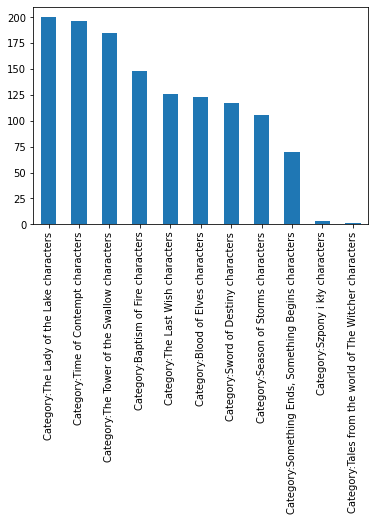

In [32]:
# Plotting the frequency of characters per book
character_df=pd.DataFrame(character_list)
character_df['book'].value_counts().plot(kind='bar')
plt.show()

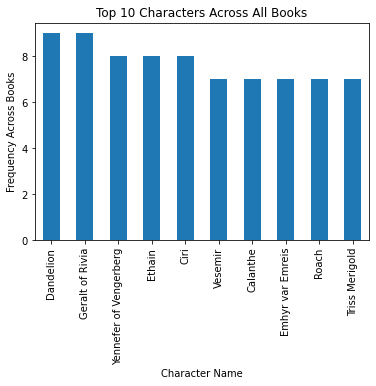

In [34]:

# Additional Analysis: Top Characters Across All Books
top_characters = character_df['character'].value_counts().head(10)
top_characters.plot(kind='bar', title="Top 10 Characters Across All Books")
plt.xlabel("Character Name")
plt.ylabel("Frequency Across Books")
plt.show()


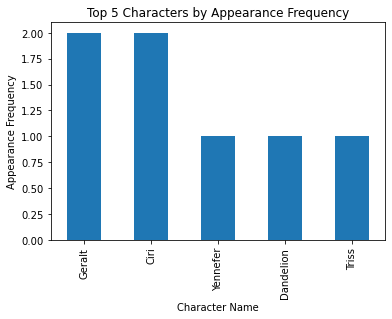

In [45]:
# Count frequency of each character's appearance across all books
character_frequency = character_df['character'].value_counts()
character_frequency.head(5).plot(kind='bar', title="Top 5 Characters by Appearance Frequency")
plt.xlabel("Character Name")
plt.ylabel("Appearance Frequency")
plt.show()


In [54]:
##Percentage of total appearance of characters
top_5_characters = character_df['character'].value_counts().nlargest(5)
top_5_percentage = (top_5_characters / character_df['character'].count()) * 100
print("Top 10 characters by percentage of total appearances:\n", top_5_percentage)

Top 10 characters by percentage of total appearances:
 Geralt       28.571429
Ciri         28.571429
Yennefer     14.285714
Dandelion    14.285714
Triss        14.285714
Name: character, dtype: float64


In [58]:
df=pd.DataFrame(character_list)
df

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


In [62]:
df.to_csv(r'D:\Data set for my projects\character_data.csv', index=False,sep=',')